In [145]:
!pip install pandas
!pip install scikit-learn

In [187]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

2.0.2
1.23.5


### Reading the dataset

In [201]:
# check xgboost version
data_path = "..\Data\Final_Well_Block_Data.csv"
df = pd.read_csv(data_path)
print("\nLoaded Data :", data_path, "\n----------------------------------------------")
# print("\n","\n",df.head())
df.drop(['DTCO .US/F                 :  Compressional slowness','DTSM .US/F                 :  Fast Shear Slowness'], axis = 1)
# df.drop(['A'], axis=1)
print("\n","\n",df.head())


Loaded Data : ..\Data\Final_Well_Block_Data.csv 
----------------------------------------------

 
    Well        mTVDSS     Northing      Easting  \
0    105  2795.135390  839185.2579  2516793.718   
1    105  2800.650663  839185.2262  2516793.735   
2    105  2807.395851  839185.1874  2516793.755   
3    105  2814.086270  839185.1489  2516793.775   
4    105  2820.730553  839185.1106  2516793.794   

   ANGLE_FAIL.DEG                  :  Fail Angle  \
0                                         41.473   
1                                         42.762   
2                                         41.913   
3                                         42.630   
4                                         40.113   

   BRIT_IND.                     :  Brittleness Index  \
0                                             72.563    
1                                             77.234    
2                                             70.998    
3                                             72.06

### Normalization 

In [202]:
df_max_scaled = df.copy()
i = 0  
# apply normalization techniques
for column in df_max_scaled.iloc[:,1:].columns:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# ## view normalized data
display(df_max_scaled)

,Well,mTVDSS,Northing,Easting,ANGLE_FAIL.DEG : Fail Angle,BRIT_IND. : Brittleness Index,BRIT_PR. : Brittleness Index from Poisson's Ratio,BRIT_YM. : Brittleness Index from Young's Modulus,CS .M/MIN : Compressive Strength,DTCO .US/F : Compressional slowness,...,STRESS_CUM.PSI : Cumulative stress (SHPZ),UCS_BF.PSI : Uniaxial Compressive Strength (BF),UCS_LAL.PSI : Uniaxial Compressive Strength (lal),VP .FT/S : Compressional velocity,VPVS . : Vp / Vs ratio,VS .FT/S : Shear velocity,YM . : Youngs' Modulus,YM_STAT. : Youngs' Modulus (Static),PRESS_PP.PSI : Pore Pressure,Well Block Pressure (psi)
0,105,0.793163,0.999582,0.999656,0.041504,0.545267,0.466072,0.550043,0.825238,0.061973,...,0.573671,0.504677,0.721814,0.765055,0.669819,0.777754,0.586058,0.477789,0.952990,0.904711
1,105,0.794728,0.999582,0.999656,0.042794,0.580366,0.432713,0.630977,0.863413,0.058327,...,0.668761,0.583069,0.778459,0.812895,0.679669,0.814075,0.660497,0.560470,0.953656,0.905151
2,105,0.796642,0.999582,0.999656,0.041944,0.533507,0.426764,0.559202,0.838098,0.060712,...,0.673510,0.513313,0.740642,0.780956,0.681639,0.779922,0.594551,0.486888,0.954464,0.905689
3,105,0.798540,0.999582,0.999656,0.042662,0.541517,0.405633,0.587385,0.859427,0.058694,...,0.732857,0.540262,0.772437,0.807809,0.688731,0.798621,0.620433,0.515362,0.955265,0.906223
4,105,0.800426,0.999582,0.999656,0.040143,0.446543,0.330479,0.487244,0.786559,0.065985,...,0.740864,0.447084,0.666742,0.718543,0.716312,0.682791,0.528285,0.417123,0.956059,0.906754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,102,0.926454,0.998037,0.999859,0.040067,0.463503,0.392581,0.470152,0.784453,0.066214,...,0.657639,0.431901,0.663810,0.716067,0.693065,0.703366,0.512580,0.401076,0.992971,0.993074
1297,102,0.928337,0.998037,0.999859,0.041344,0.457198,0.296848,0.528708,0.820603,0.062437,...,0.789354,0.484795,0.715091,0.759377,0.730890,0.707424,0.566426,0.456849,0.993290,0.994745
1298,102,0.930218,0.998037,0.999859,0.037967,0.415095,0.433519,0.362175,0.727845,0.072757,...,0.572722,0.340808,0.587561,0.651670,0.679669,0.652860,0.413301,0.304990,0.993595,0.996368
1299,102,0.932098,0.998037,0.999859,0.041592,0.478028,0.305419,0.556342,0.827782,0.061721,...,0.743538,0.510613,0.725518,0.768183,0.726950,0.719355,0.591907,0.484051,0.993899,0.998008


In [203]:
X, y = df_max_scaled.iloc[:, 1:-1], df_max_scaled.iloc[:, -1]
print("\n", X.head(), "\n", y.head())


      mTVDSS  Northing   Easting  \
0  0.793163  0.999582  0.999656   
1  0.794728  0.999582  0.999656   
2  0.796642  0.999582  0.999656   
3  0.798540  0.999582  0.999656   
4  0.800426  0.999582  0.999656   

   ANGLE_FAIL.DEG                  :  Fail Angle  \
0                                       0.041504   
1                                       0.042794   
2                                       0.041944   
3                                       0.042662   
4                                       0.040143   

   BRIT_IND.                     :  Brittleness Index  \
0                                           0.545267    
1                                           0.580366    
2                                           0.533507    
3                                           0.541517    
4                                           0.446543    

   BRIT_PR.                     :  Brittleness Index from Poisson's Ratio  \
0                                           0.466072  

In [204]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
print("\n", train_X.head(), "\n", test_X.head(), "\n\n\n", train_y.head(), "\n", test_y.head())


         mTVDSS  Northing   Easting  \
305   0.928329  0.999997  0.999440   
957   0.999620  0.997352  0.999944   
1188  0.788152  0.998036  0.999859   
839   0.837809  0.997745  1.000000   
392   0.870479  0.998832  0.999480   

      ANGLE_FAIL.DEG                  :  Fail Angle  \
305                                        0.038853   
957                                        0.043206   
1188                                      -1.000000   
839                                        0.038383   
392                                        0.043025   

      BRIT_IND.                     :  Brittleness Index  \
305                                            0.425502    
957                                            0.529344    
1188                                           1.000000    
839                                            0.306504    
392                                            0.487023    

      BRIT_PR.                     :  Brittleness Index from Poisson's Ratio 

### Fitting SVR to the Dataset

In [278]:
from sklearn.svm import SVR
regressor = SVR(C=1000, gamma=0.01, kernel ='linear', degree = 3)
regressor.fit(train_X,train_y)

SVR(C=1000, gamma=0.01, kernel='linear')

### Predicting a new result

In [279]:
y_pred = regressor.predict(test_X)
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))
r2_score(test_y,y_pred)


RMSE :  0.117731


0.6088532764034575

### Checking Overfitting

In [280]:
y_pred_train = regressor.predict(train_X)
rmse_train = np.sqrt(MSE(train_y, y_pred_train))
print("RMSE: %f" %(rmse))
r2_score(train_y, y_pred_train)

RMSE: 0.117731


0.6345059881441119

In [281]:
df_107 = df_max_scaled.iloc[214:330]
# X_TVD_107 = df[:6000:100]['mTVDSS']
X_107, y_107 = df_107.iloc[:, 1:-1], df_107.iloc[:, -1]
# X_TVD_107

### Visualizing the SVR results

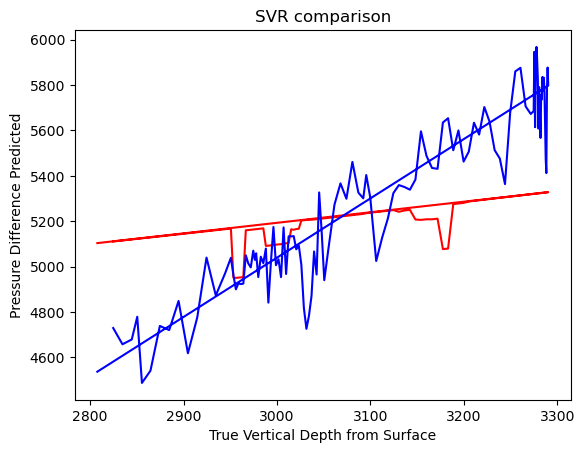

In [282]:
plt.plot(X_107['mTVDSS']*df['mTVDSS'].abs().max(),y_107*df['Well Block Pressure (psi)'].abs().max(), color = 'red')
plt.plot(X_107['mTVDSS']*df['mTVDSS'].abs().max(), regressor.predict(X_107)*df['Well Block Pressure (psi)'].abs().max(), color = 'blue')
plt.title('SVR comparison')
plt.xlabel('True Vertical Depth from Surface')
plt.ylabel('Pressure Difference Predicted')
plt.show()

In [227]:
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['linear', 'rbf'],
    'degree' : [3,4,5,6]
}

svr = SVR(kernel ='rbf')

grid = GridSearchCV(svr, param_grid, refit = True, cv=5, scoring='neg_mean_squared_error', verbose = 3)

#fitting the model for grid search
grid.fit(train_X,train_y)
print("best parameters are:", grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-0.024 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-0.028 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-0.025 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-0.030 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, gamma=1, kernel=linear;, score=-0.027 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 2/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 3/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-0.026 total time=   0.0s
[CV 4/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-0.031 total time=   0.0s
[CV 5/5] END C=0.001, degree=3, gamma=1, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 1/5] END C=0.001, degree=3, gamma=0.1, kernel=linear;, sc

[CV 4/5] END C=0.001, degree=4, gamma=0.0001, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 5/5] END C=0.001, degree=4, gamma=0.0001, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 1/5] END C=0.001, degree=5, gamma=1, kernel=linear;, score=-0.024 total time=   0.0s
[CV 2/5] END C=0.001, degree=5, gamma=1, kernel=linear;, score=-0.028 total time=   0.0s
[CV 3/5] END C=0.001, degree=5, gamma=1, kernel=linear;, score=-0.025 total time=   0.0s
[CV 4/5] END C=0.001, degree=5, gamma=1, kernel=linear;, score=-0.030 total time=   0.0s
[CV 5/5] END C=0.001, degree=5, gamma=1, kernel=linear;, score=-0.027 total time=   0.0s
[CV 1/5] END C=0.001, degree=5, gamma=1, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 2/5] END C=0.001, degree=5, gamma=1, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 3/5] END C=0.001, degree=5, gamma=1, kernel=rbf;, score=-0.026 total time=   0.0s
[CV 4/5] END C=0.001, degree=5, gamma=1, kernel=rbf;, score=-0.031 total time=   0.0s
[CV 5/5] END C=0.001, degree=

[CV 4/5] END C=0.001, degree=6, gamma=0.0001, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 5/5] END C=0.001, degree=6, gamma=0.0001, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, gamma=1, kernel=linear;, score=-0.017 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, gamma=1, kernel=linear;, score=-0.019 total time=   0.0s
[CV 3/5] END C=0.01, degree=3, gamma=1, kernel=linear;, score=-0.017 total time=   0.0s
[CV 4/5] END C=0.01, degree=3, gamma=1, kernel=linear;, score=-0.021 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, gamma=1, kernel=linear;, score=-0.018 total time=   0.0s
[CV 1/5] END C=0.01, degree=3, gamma=1, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 2/5] END C=0.01, degree=3, gamma=1, kernel=rbf;, score=-0.019 total time=   0.0s
[CV 3/5] END C=0.01, degree=3, gamma=1, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 4/5] END C=0.01, degree=3, gamma=1, kernel=rbf;, score=-0.021 total time=   0.0s
[CV 5/5] END C=0.01, degree=3, gamma=1

[CV 2/5] END C=0.01, degree=4, gamma=0.0001, kernel=linear;, score=-0.019 total time=   0.0s
[CV 3/5] END C=0.01, degree=4, gamma=0.0001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 4/5] END C=0.01, degree=4, gamma=0.0001, kernel=linear;, score=-0.021 total time=   0.0s
[CV 5/5] END C=0.01, degree=4, gamma=0.0001, kernel=linear;, score=-0.018 total time=   0.0s
[CV 1/5] END C=0.01, degree=4, gamma=0.0001, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 2/5] END C=0.01, degree=4, gamma=0.0001, kernel=rbf;, score=-0.035 total time=   0.0s
[CV 3/5] END C=0.01, degree=4, gamma=0.0001, kernel=rbf;, score=-0.031 total time=   0.0s
[CV 4/5] END C=0.01, degree=4, gamma=0.0001, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 5/5] END C=0.01, degree=4, gamma=0.0001, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 1/5] END C=0.01, degree=5, gamma=1, kernel=linear;, score=-0.017 total time=   0.0s
[CV 2/5] END C=0.01, degree=5, gamma=1, kernel=linear;, score=-0.019 total time=   0.0s
[C

[CV 5/5] END C=0.01, degree=6, gamma=0.001, kernel=linear;, score=-0.018 total time=   0.0s
[CV 1/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 2/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-0.035 total time=   0.0s
[CV 3/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-0.031 total time=   0.0s
[CV 4/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 5/5] END C=0.01, degree=6, gamma=0.001, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 1/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 2/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-0.019 total time=   0.0s
[CV 3/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 4/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-0.021 total time=   0.0s
[CV 5/5] END C=0.01, degree=6, gamma=0.0001, kernel=linear;, score=-0.018 total time=   0.0

[CV 3/5] END C=0.1, degree=4, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=0.001, kernel=linear;, score=-0.018 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-0.035 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=0.001, kernel=rbf;, score=-0.032 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=0.0001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=0.0001, kernel=linear;, score=-0.016 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=0.0001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 4/5] EN

[CV 4/5] END C=0.1, degree=6, gamma=0.01, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 5/5] END C=0.1, degree=6, gamma=0.01, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-0.016 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 4/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-0.018 total time=   0.0s
[CV 5/5] END C=0.1, degree=6, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 1/5] END C=0.1, degree=6, gamma=0.001, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 2/5] END C=0.1, degree=6, gamma=0.001, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 3/5] END C=0.1, degree=6, gamma=0.001, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 4/5] END C=0.1, degree=6, gamma=0.001, kernel=rbf;, score=-0.035 total time=   0.0s
[CV 5/5] END C=0.1,

[CV 5/5] END C=1, degree=4, gamma=0.01, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=0.001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=0.001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=0.001, kernel=rbf;, score=-0.022 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=0.001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=0.001, kernel=rbf;, score=-0.022 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=0.001, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=0.001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=0.0001

[CV 2/5] END C=1, degree=6, gamma=0.001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 3/5] END C=1, degree=6, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 4/5] END C=1, degree=6, gamma=0.001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 5/5] END C=1, degree=6, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 1/5] END C=1, degree=6, gamma=0.001, kernel=rbf;, score=-0.022 total time=   0.0s
[CV 2/5] END C=1, degree=6, gamma=0.001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 3/5] END C=1, degree=6, gamma=0.001, kernel=rbf;, score=-0.022 total time=   0.0s
[CV 4/5] END C=1, degree=6, gamma=0.001, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 5/5] END C=1, degree=6, gamma=0.001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 1/5] END C=1, degree=6, gamma=0.0001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 2/5] END C=1, degree=6, gamma=0.0001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 3/5] END C=1, degree=6, gamma=

[CV 2/5] END C=10, degree=4, gamma=0.01, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=0.01, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=0.01, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=0.01, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=0.001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=0.001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 3/5] END C=10, degree=4, gam

[CV 2/5] END C=10, degree=6, gamma=0.01, kernel=linear;, score=-0.017 total time=   0.0s
[CV 3/5] END C=10, degree=6, gamma=0.01, kernel=linear;, score=-0.014 total time=   0.0s
[CV 4/5] END C=10, degree=6, gamma=0.01, kernel=linear;, score=-0.017 total time=   0.0s
[CV 5/5] END C=10, degree=6, gamma=0.01, kernel=linear;, score=-0.014 total time=   0.0s
[CV 1/5] END C=10, degree=6, gamma=0.01, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 2/5] END C=10, degree=6, gamma=0.01, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 3/5] END C=10, degree=6, gamma=0.01, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 4/5] END C=10, degree=6, gamma=0.01, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 5/5] END C=10, degree=6, gamma=0.01, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 1/5] END C=10, degree=6, gamma=0.001, kernel=linear;, score=-0.014 total time=   0.0s
[CV 2/5] END C=10, degree=6, gamma=0.001, kernel=linear;, score=-0.017 total time=   0.0s
[CV 3/5] END C=10, degree=6, gamma

[CV 5/5] END C=100, degree=4, gamma=0.1, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 1/5] END C=100, degree=4, gamma=0.01, kernel=linear;, score=-0.014 total time=   0.0s
[CV 2/5] END C=100, degree=4, gamma=0.01, kernel=linear;, score=-0.017 total time=   0.0s
[CV 3/5] END C=100, degree=4, gamma=0.01, kernel=linear;, score=-0.014 total time=   0.0s
[CV 4/5] END C=100, degree=4, gamma=0.01, kernel=linear;, score=-0.016 total time=   0.0s
[CV 5/5] END C=100, degree=4, gamma=0.01, kernel=linear;, score=-0.014 total time=   0.0s
[CV 1/5] END C=100, degree=4, gamma=0.01, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 2/5] END C=100, degree=4, gamma=0.01, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 3/5] END C=100, degree=4, gamma=0.01, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 4/5] END C=100, degree=4, gamma=0.01, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 5/5] END C=100, degree=4, gamma=0.01, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 1/5] END C=100, degree=4,

[CV 3/5] END C=100, degree=6, gamma=0.1, kernel=linear;, score=-0.014 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=0.1, kernel=linear;, score=-0.016 total time=   0.1s
[CV 5/5] END C=100, degree=6, gamma=0.1, kernel=linear;, score=-0.014 total time=   0.0s
[CV 1/5] END C=100, degree=6, gamma=0.1, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 2/5] END C=100, degree=6, gamma=0.1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 3/5] END C=100, degree=6, gamma=0.1, kernel=rbf;, score=-0.013 total time=   0.0s
[CV 4/5] END C=100, degree=6, gamma=0.1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 5/5] END C=100, degree=6, gamma=0.1, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 1/5] END C=100, degree=6, gamma=0.01, kernel=linear;, score=-0.014 total time=   0.0s
[CV 2/5] END C=100, degree=6, gamma=0.01, kernel=linear;, score=-0.017 total time=   0.1s
[CV 3/5] END C=100, degree=6, gamma=0.01, kernel=linear;, score=-0.014 total time=   0.1s
[CV 4/5] END C=100, degree=6, gam

### Feature Importance Calculation

In [ ]:
#permutation importance
results = permutation_importance(regressor, train_X, train_y, scoring = 'neg_mean_squared_error')

#get feature importance
importance = results.importances_mean

In [27]:
list_features = ['mTVDSS','Northing', 'Easting','ANGLE_FAIL.DEG                  :  Fail Angle','BRIT_IND.                     :  Brittleness Index','BRIT_PR.                     :  Brittleness Index from Poisson\'s Ratio', 'BRIT_YM.                     :  Brittleness Index from Young\'s Modulus','BRIT_AVG','CS   .M/MIN                 :  Compressive Strength','DTCO .US/F                 :  Compressional slowness','DTSM .US/F                 :  Fast Shear Slowness','IP   .RAYL/M2                 :  P Impedence','IS   .RAYL/M2                 :  S Impedance','KBULK.                     :  Bulk Mudulus','LAMBDA.                     :  Lambda','LAMRHO.                     :  ','MU   .CP                   :  Mu','PR   .                     :  Poisson\'s ratio','PRESS_OB.PSI                  :  Over-burden Pressure','PRESS_SHMAX.PSI                  :  Horizontal Stress (Max)','PRESS_SHMIN.PSI                  :  Horizontal Stress (Min)','PR_STAT.                     :  Poisson\'s ratio (Static)','PZS  .PSI                  :  Processed Zone Stress','SHMAX_GRAD.                     :  Horizontal Stress Gradient (Max)','SHMIN_GRAD.                     :  Horizontal Stress Gradient (Min)','STRESS_CUM.PSI                  :  Cumulative stress (SHPZ)','UCS_BF.PSI                  :  Uniaxial Compressive Strength (BF)','UCS_LAL.PSI                  :  Uniaxial Compressive Strength (lal)','VP   .FT/S                 :  Compressional velocity','VPVS .                     :  Vp / Vs ratio','VS   .FT/S                 :  Shear velocity','YM   .                     :  Youngs\' Modulus','YM_STAT.                     :  Youngs\' Modulus (Static)', ]
#summarize feature importance 
j=0
for i,v in enumerate(importance):
    print(list_features[j],'Feature: %0d, Score: %.5f' %(i,v))
    j+=1



mTVDSS Feature: 0, Score: 33923.75925
Northing Feature: 1, Score: 35506.87350
Easting Feature: 2, Score: 0.01107
ANGLE_FAIL.DEG                  :  Fail Angle Feature: 3, Score: 0.13878
BRIT_IND.                     :  Brittleness Index Feature: 4, Score: 14844.55321
BRIT_PR.                     :  Brittleness Index from Poisson's Ratio Feature: 5, Score: 37803.39066
BRIT_YM.                     :  Brittleness Index from Young's Modulus Feature: 6, Score: 661.08432
BRIT_AVG Feature: 7, Score: 66137.11614
CS   .M/MIN                 :  Compressive Strength Feature: 8, Score: 37804.70268
DTCO .US/F                 :  Compressional slowness Feature: 9, Score: 22205.30272
DTSM .US/F                 :  Fast Shear Slowness Feature: 10, Score: 30114.47593
IP   .RAYL/M2                 :  P Impedence Feature: 11, Score: 18348.46512
IS   .RAYL/M2                 :  S Impedance Feature: 12, Score: 37480.42717
KBULK.                     :  Bulk Mudulus Feature: 13, Score: 37298.78727
LAMBDA.     

IndexError: list index out of range

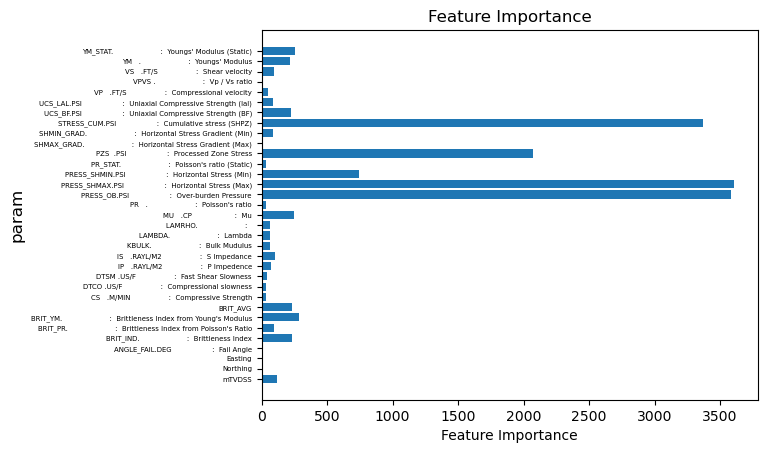

In [86]:
plt.barh(list_features, importance)

# setting label of y-axis 
# setting label of x-axis
plt.xlabel("Feature Importance")
plt.ylabel('param', fontsize = 12)
plt.yticks(fontsize = 5)
plt.title("Feature Importance")
plt.show()

In [111]:
drop_col = []
thres = 100
for i,v in enumerate(importance):
    if(abs(v) < thres):
        drop_col.append(list_features[i])
        print(list_features[i])

Northing
Easting
ANGLE_FAIL.DEG                  :  Fail Angle
BRIT_PR.                     :  Brittleness Index from Poisson's Ratio
CS   .M/MIN                 :  Compressive Strength
DTCO .US/F                 :  Compressional slowness
DTSM .US/F                 :  Fast Shear Slowness
IP   .RAYL/M2                 :  P Impedence
IS   .RAYL/M2                 :  S Impedance
KBULK.                     :  Bulk Mudulus
LAMBDA.                     :  Lambda
LAMRHO.                     :  
PR   .                     :  Poisson's ratio
PR_STAT.                     :  Poisson's ratio (Static)
SHMAX_GRAD.                     :  Horizontal Stress Gradient (Max)
SHMIN_GRAD.                     :  Horizontal Stress Gradient (Min)
UCS_LAL.PSI                  :  Uniaxial Compressive Strength (lal)
VP   .FT/S                 :  Compressional velocity
VPVS .                     :  Vp / Vs ratio
VS   .FT/S                 :  Shear velocity


In [116]:
df_drop_col_scaled = df_max_scaled.drop(drop_col[2:],axis = 1)

In [117]:
X, y = df_drop_col_scaled.iloc[lambda x: x.index % 10 == 0, 1:-1], df_drop_col_scaled.iloc[lambda x: x.index % 10 == 0, -1]
# print("\n", X.head(), "\n", y.head())
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
print("\n", train_X.head(), "\n", test_X.head(), "\n\n\n", train_y.head(), "\n", test_y.head())



          mTVDSS  Northing   Easting  \
14150  0.805317  0.999556  1.000000   
9630   0.896376  0.999622  0.999775   
5660   0.969087  0.999991  0.999779   
2860   0.849222  0.999922  0.999795   
8070   0.829791  0.999590  0.999789   

       BRIT_IND.                     :  Brittleness Index  \
14150                                           0.666413    
9630                                            0.880404    
5660                                            0.546157    
2860                                            0.732521    
8070                                            0.398600    

       BRIT_YM.                     :  Brittleness Index from Young's Modulus  \
14150                                           0.477811                        
9630                                            0.887025                        
5660                                            0.468592                        
2860                                            0.747720                

### SVR Dropping columns

In [119]:
param = {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
regressor = SVR(C=1000, gamma=1, kernel ='rbf')
regressor.fit(train_X,train_y)

SVR(C=1000, gamma=1)

In [120]:
y_pred = regressor.predict(test_X)
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))
r2_score(test_y,y_pred)

RMSE :  1.346095


0.9998835350728533

### Visualizing for a well

In [121]:
df_107 = df_drop_col_scaled.iloc[:6000]
# X_TVD_107 = df[:6000:100]['mTVDSS']
X_107, y_107 = df_107.iloc[lambda x: x.index % 149 == 0, 1:-1], df_107.iloc[lambda x: x.index % 149 == 0, -1]
# X_TVD_107

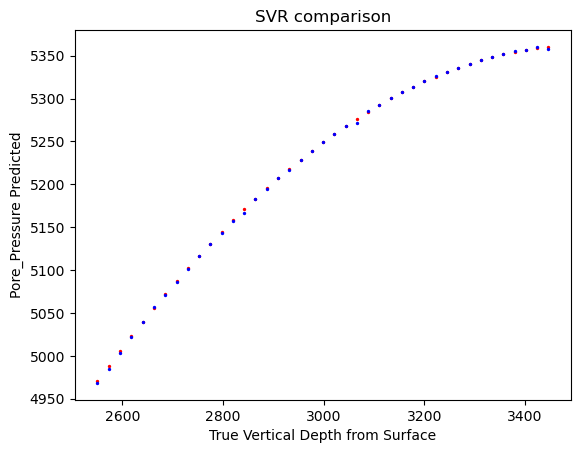

In [122]:
plt.scatter(X_107['mTVDSS']*df['mTVDSS'].abs().max(),y_107, color = 'red', s = 2)
plt.scatter(X_107['mTVDSS']*df['mTVDSS'].abs().max(), regressor.predict(X_107), color = 'blue', s=2)
plt.title('SVR comparison')
plt.xlabel('True Vertical Depth from Surface')
plt.ylabel('Pore_Pressure Predicted')
plt.show()

In [125]:
#permutation importance
results = permutation_importance(regressor, train_X, train_y, scoring = 'neg_mean_squared_error')

#get feature importance
importance = results.importances_mean

In [126]:
##Dropped cols

##ANGLE_FAIL.DEG                  :  Fail Angle
##BRIT_PR.                     :  Brittleness Index from Poisson's Ratio
##CS   .M/MIN                 :  Compressive Strength
##DTCO .US/F                 :  Compressional slowness
##DTSM .US/F                 :  Fast Shear Slowness
##IP   .RAYL/M2                 :  P Impedence
##IS   .RAYL/M2                 :  S Impedance
##KBULK.                     :  Bulk Mudulus
##LAMBDA.                     :  Lambda
##LAMRHO.                     :  
##PR   .                     :  Poisson's ratio
##PR_STAT.                     :  Poisson's ratio (Static)
##SHMAX_GRAD.                     :  Horizontal Stress Gradient (Max)
##SHMIN_GRAD.                     :  Horizontal Stress Gradient (Min)
##UCS_LAL.PSI                  :  Uniaxial Compressive Strength (lal)
##VP   .FT/S                 :  Compressional velocity
##VPVS .                     :  Vp / Vs ratio
##VS   .FT/S                 :  Shear velocity

list_features = ['mTVDSS','Northing', 'Easting','BRIT_IND.                     :  Brittleness Index', 'BRIT_YM.                     :  Brittleness Index from Young\'s Modulus','BRIT_AVG','MU   .CP                   :  Mu','PRESS_OB.PSI                  :  Over-burden Pressure','PRESS_SHMAX.PSI                  :  Horizontal Stress (Max)','PRESS_SHMIN.PSI                  :  Horizontal Stress (Min)','PZS  .PSI                  :  Processed Zone Stress','STRESS_CUM.PSI                  :  Cumulative stress (SHPZ)','UCS_BF.PSI                  :  Uniaxial Compressive Strength (BF)','YM   .                     :  Youngs\' Modulus','YM_STAT.                     :  Youngs\' Modulus (Static)']
#summarize feature importance 
j=0
for i,v in enumerate(importance):
    print(list_features[j],'Feature: %0d, Score: %.5f' %(i,v))
    j+=1



mTVDSS Feature: 0, Score: 96.48174
Northing Feature: 1, Score: 0.00187
Easting Feature: 2, Score: 0.00563
BRIT_IND.                     :  Brittleness Index Feature: 3, Score: 2559.01164
BRIT_YM.                     :  Brittleness Index from Young's Modulus Feature: 4, Score: 712.86707
BRIT_AVG Feature: 5, Score: 2560.66174
MU   .CP                   :  Mu Feature: 6, Score: 471.52854
PRESS_OB.PSI                  :  Over-burden Pressure Feature: 7, Score: 4216.28540
PRESS_SHMAX.PSI                  :  Horizontal Stress (Max) Feature: 8, Score: 4270.63201
PRESS_SHMIN.PSI                  :  Horizontal Stress (Min) Feature: 9, Score: 702.11503
PZS  .PSI                  :  Processed Zone Stress Feature: 10, Score: 1896.87168
STRESS_CUM.PSI                  :  Cumulative stress (SHPZ) Feature: 11, Score: 3073.60339
UCS_BF.PSI                  :  Uniaxial Compressive Strength (BF) Feature: 12, Score: 433.59859
YM   .                     :  Youngs' Modulus Feature: 13, Score: 551.49690
YM_

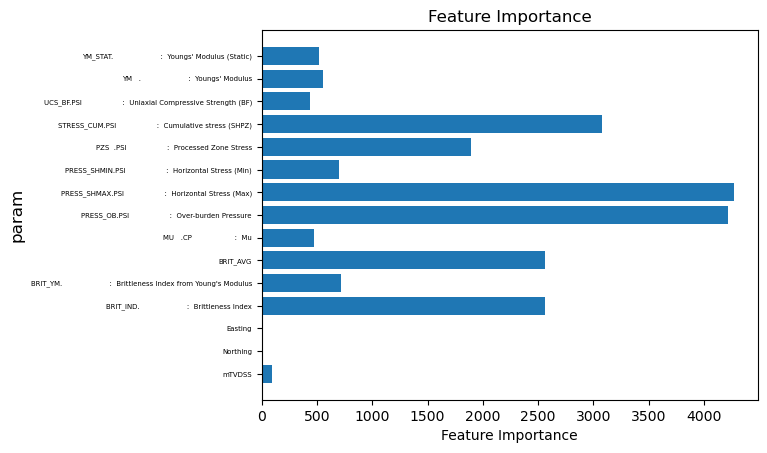

In [127]:
plt.barh(list_features, importance)

# setting label of y-axis 
# setting label of x-axis
plt.xlabel("Feature Importance")
plt.ylabel('param', fontsize = 12)
plt.yticks(fontsize = 5)
plt.title("Feature Importance")
plt.show()

### Important params

In [128]:
imp_col = []
thres = 1000
for i,v in enumerate(importance):
    if(abs(v) > thres):
        imp_col.append(list_features[i])
        print(list_features[i])

BRIT_IND.                     :  Brittleness Index
BRIT_AVG
PRESS_OB.PSI                  :  Over-burden Pressure
PRESS_SHMAX.PSI                  :  Horizontal Stress (Max)
PZS  .PSI                  :  Processed Zone Stress
STRESS_CUM.PSI                  :  Cumulative stress (SHPZ)
